# "Waves in 2-D Motion"


The end goal of this particular project is to create an animated representation of a circular set of waves at have a center at the origin. These circular waves propogate outwards as a function of time and the animation should show how they move.

To get started, a wave function is needed so the wave can be represented. This equation is given by:

$$z(x,y) = z_0\sin\Big(k\sqrt{x^2+y^2}-\omega t\Big)$$

where:
- z0 - amplitude
- k - wave number
- w - angular frequency
- t - time
- x and y - positional dimensions

The x and y here will be a set of arrays through which an equation will take. Inputs for the rest of the components will also be taken as part of the wave function that must be defined.

Imports for this project include: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython import display
from matplotlib.animation import FuncAnimation 

In [8]:
def wave(t, z0, k, w):
    
    x = np.arange(-50, 50, 0.1) #step size matter here
    y = np.arange(-50, 50, 0.1)
    X, Y = np.meshgrid(x, y) #combines x and y into a grid format 
    z = z0*np.sin(np.sqrt(X**2 + Y**2) - w*t) #arrays fed into equation
    plt.imshow(z, vmin = 0, vmax = 1, origin = "lower")
    plt.colorbar()
    plt.show()
    return z 


Giving values for this function and graphing with limits yields the following result:

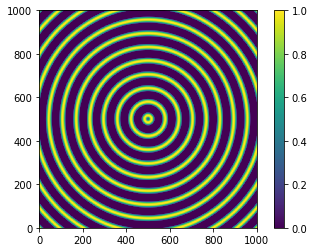

array([[0.99969142, 0.9989499 , 0.99322896, ..., 0.98257207, 0.99322896,
        0.9989499 ],
       [0.9989499 , 0.99321248, 0.9825193 , ..., 0.9669386 , 0.9825193 ,
        0.99321248],
       [0.99322896, 0.9825193 , 0.96690238, ..., 0.94647105, 0.96690238,
        0.9825193 ],
       ...,
       [0.98257207, 0.9669386 , 0.94647105, ..., 0.92128645, 0.94647105,
        0.9669386 ],
       [0.99322896, 0.9825193 , 0.96690238, ..., 0.94647105, 0.96690238,
        0.9825193 ],
       [0.9989499 , 0.99321248, 0.9825193 , ..., 0.9669386 , 0.9825193 ,
        0.99321248]])

In [9]:
wave(0, 1, 1, 1)

In order to get a better understanding of how these values for the function affect the plot, it is useful see how the change an any of the values will cause an effect. The sliders below will can help visualize this wave better as a result.

In [10]:
slider1 = widgets.IntSlider(min = 0, max = 100, step = 1, value = 10, continuous_upsdate = False)
slider2 = widgets.FloatSlider(min = 0, max = 4, step = 0.1, value = 2, continuous_update = False)
slider3 = widgets.IntSlider(min = 0, max = 100, step = 1, value = 10, continuous_update = False)
#continuous update = false so code won't run slow

gui = widgets.interactive(wave, t = 0, z0 = slider1, k = slider2, w = slider3)
display.display(gui)


interactive(children=(IntSlider(value=0, description='t', max=1), IntSlider(value=10, description='z0'), Float…

From moving the sliders around, these values affect the graph in differnet ways:

- t = 0 so this has no effect on the graph
- z0 changes the magnitude of the wave
- k changes the amount of rings per every change of 0.10
- w has no effect on the plot because t is 0

Finally, it is time to animate the plot of the 2-D wave. Showing what the plot looks like in real time is a contrast to simply changing values with widget sliders, one at a time. This animation will flow a lot more cleaner. 

In this particular animation:
- w = 10
- z0 = 10
- k = 1

[                                                            ] 0/100

ValueError: Invalid file object: <_io.BufferedReader name=74>

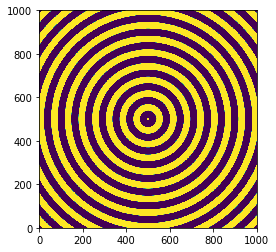

In [5]:
fig = plt.figure()

progress = display.ProgressBar(100)
progress.display()

def animate(frame):
    fig.clear()
    x = np.arange(-50, 50, 0.1)
    y = np.arange(-50, 50, 0.1)
    X, Y = np.meshgrid(x, y)
    z0, k, w = 10, 1, 10
    z = z0*np.sin(k*((X**2 + Y**2)**(1/2)) - w*frame)
    plt.imshow(z, vmin = 0, vmax = 1, origin = "lower")
    
anim = FuncAnimation(fig, animate, frames = 100, interval = 150)
video = anim.to_html5_video()
plt.close()

display.clear_output(wait = True)
display.HTML(video)


# To Summarize:

2-D wave motion can be thought of as throwing a stone straight into the water. Ripples will occur with varying frequency depending on how hard the rock is thrown. Accordingly, the frequency of the wave will be dependent on the wave number as time goes on. The wave will propogate with shorter frequency as it moves away from the origin. 

This program shows that motion in all its glory. 